In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv("lab1_train.csv")
df_test = pd.read_csv("lab1_test.csv")

df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

cutoff_date = pd.to_datetime('2015-12-31')
no_indices = 86000

# df_train_filtered = df_train[df_train['Timestamp'] > cutoff_date]
# df_test_filtered = df_test[df_test['Timestamp'] > cutoff_date]

train_s_df = np.array(df_train['LIT401'])
test_s_df = np.array(df_test['LIT401'])

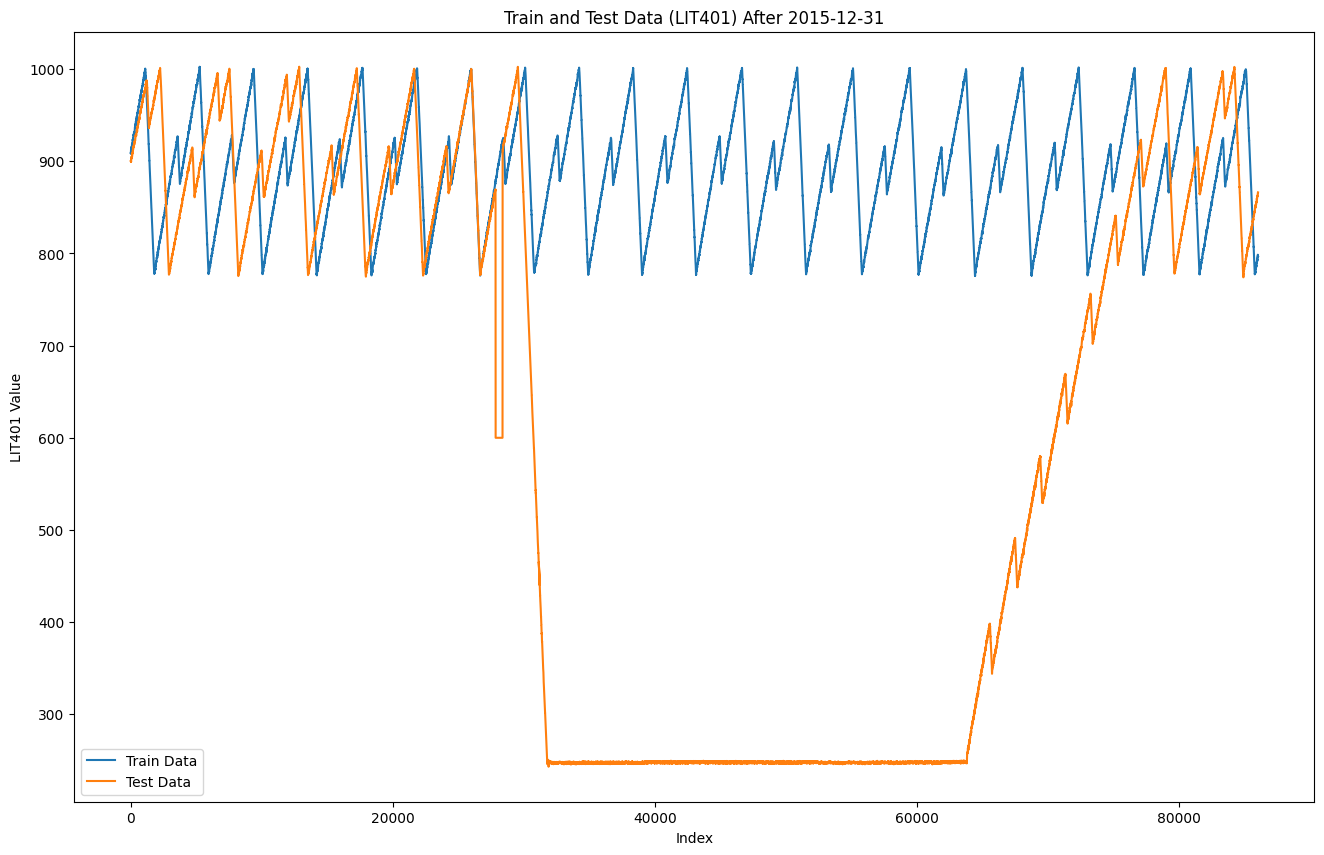

In [2]:
# train plot
plt.figure(figsize=(16,10))
plt.plot(train_s_df, label='Train Data')
plt.plot(test_s_df, label='Test Data')
plt.xlabel('Index')
plt.ylabel('LIT401 Value')
plt.title('Train and Test Data (LIT401) After 2015-12-31')
plt.legend()
plt.show()


In [2]:
def dynamic_time_warping(a, b):
    n = a.size
    m = b.size
    
    dtw_distance = np.inf
    

    def distance(x,y):
        return np.square(x-y)
    dp = -1*np.ones((n,m))

    def findBestPathLength(nCurrent,mCurrent):
        if(nCurrent >= n-1 and mCurrent >= m-1):
            dp[nCurrent][mCurrent] = distance(a[nCurrent],b[mCurrent])
            return dp[nCurrent][mCurrent]

        if(dp[nCurrent][mCurrent] != -1):
            return dp[nCurrent][mCurrent]

        pathLengthFromNext = []
        if(mCurrent < m-1):
            pathLengthFromNext.append(findBestPathLength(nCurrent,mCurrent+1))
            if(nCurrent < n-1):
                pathLengthFromNext.append(findBestPathLength(nCurrent+1,mCurrent+1))
        
        if(nCurrent < n-1):
                pathLengthFromNext.append(findBestPathLength(nCurrent+1,mCurrent))

        dp[nCurrent][mCurrent] = distance(a[nCurrent],b[mCurrent]) + np.min(pathLengthFromNext)

        return dp[nCurrent][mCurrent]
    
    dtw_distance = float(np.sqrt(findBestPathLength(0,0)))
    return dtw_distance


Created sub-sample: [    0     1     2 ... 18397 18398 18399]
Completed Windows
Woking on window: 0
Completed window: 0
Woking on window: 1
Completed window: 1
Woking on window: 2
Completed window: 2
Woking on window: 3
Completed window: 3
Woking on window: 4
Completed window: 4
Woking on window: 5
Completed window: 5
Woking on window: 6
Completed window: 6
Woking on window: 7
Completed window: 7
Woking on window: 8
Completed window: 8
Woking on window: 9
Completed window: 9
Woking on window: 10
Completed window: 10
Woking on window: 11
Completed window: 11
Woking on window: 12
Completed window: 12
Woking on window: 13
Completed window: 13
Woking on window: 14
Completed window: 14
Woking on window: 15
Completed window: 15
Woking on window: 16
Completed window: 16
Woking on window: 17
Completed window: 17
Woking on window: 18
Completed window: 18
Woking on window: 19
Completed window: 19
Woking on window: 20
Completed window: 20
Woking on window: 21
Completed window: 21
Woking on window

Text(0.5, 1.0, 'Residual Graph')

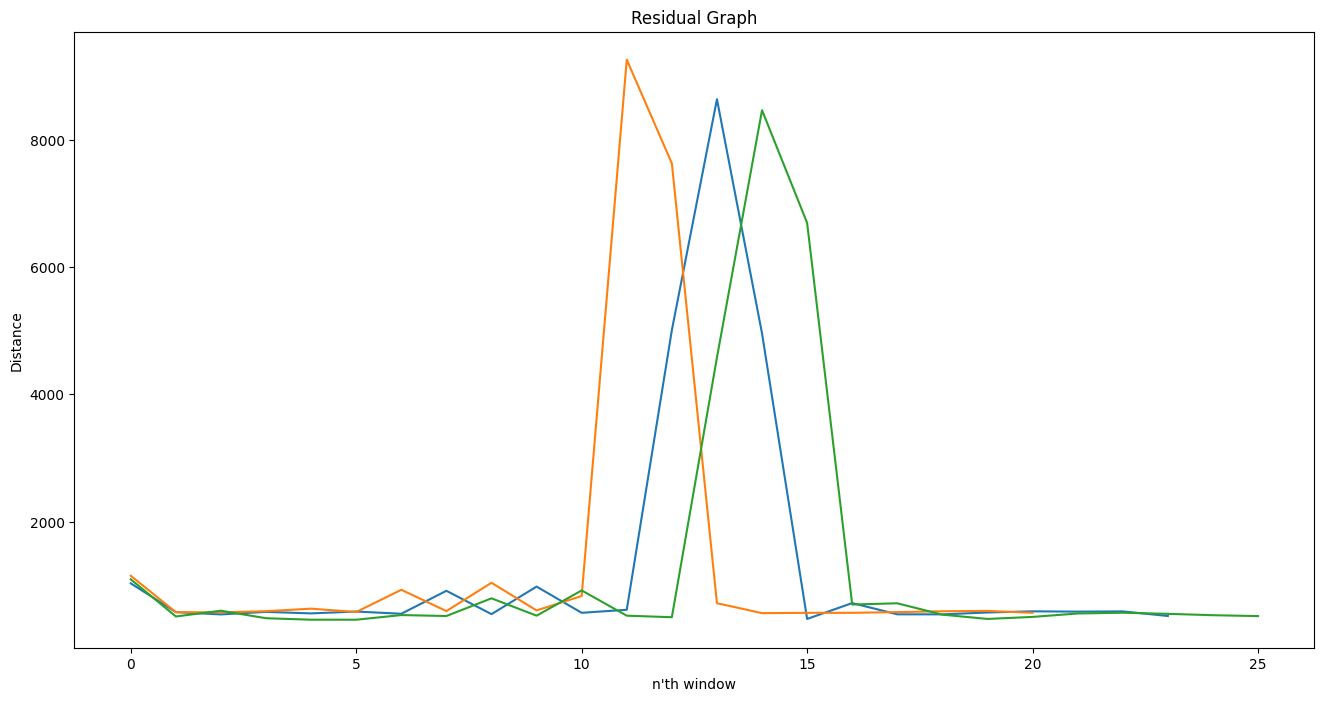

In [ ]:
def signal_slidding_window(window_shape, start_index, end_index, repre_window_start, repre_window_end):
    
    sig_test = test_s_df.tolist()

    # These will be all the windows from the test file
    windows_data_test = []
    
    # Our chossen representative window
    windows_data_train = train_s_df[repre_window_start:repre_window_end]
    
    range_sample = np.arange(repre_window_end - repre_window_start)
    print(f"Created sub-sample: {range_sample}")
    
    # Taking a 1/10th sample of all the windows
    sizeOfSample = int((repre_window_end - repre_window_start)/100)
    sub_sample = np.random.choice(range_sample, size=sizeOfSample, replace=False)
    
    # Analysing on the full data set
    if (end_index == -1): 
        end_index = len(sig_test)

    # Silding windows created on the test data set
    windows_data_test = np.lib.stride_tricks.sliding_window_view(sig_test[start_index:end_index], window_shape=window_shape)[::window_shape]
    
    # Residula data using algorithm
    residualData = []
    
    print("Completed Windows")
    
    for i in range(len(windows_data_test)):
        print(f"Woking on window: {i}")
        dist = dynamic_time_warping(windows_data_test[i][sub_sample], windows_data_train[sub_sample])
        print(f"Completed window: {i}")
        residualData.append(dist)

    return np.array(residualData)


# These are the representative windows to use on the data test set
windows = [[58800,77200], [346100, 367050], [247400,264400]]
plt.figure(figsize=(16,8))
for l in windows:
    w_size = l[1] - l[0]
    data = signal_slidding_window(window_shape = w_size, start_index = 0, end_index = -1, repre_window_start = l[0], repre_window_end = l[1])
    plt.plot(data, label = "Residuals")

plt.xlabel("n'th window")
plt.ylabel("Distance")
plt.title('Residual Graph')